## Feature Selection using Information Gain-- Mutual Information in Regression Problem Statement

### Mutual Information 

Estimate Mutual Information for a continuous random variable
Mutual Information betweebn two variabl is non-negative value, which measures dependenany between two random variable. It will be zero if and only if two random variable are independent.
and higher value means higher dependency.
The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

### I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.


In [4]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv('Housing_price.csv')

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [13]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols=list(df.select_dtypes(include=numeric_lst).columns)

In [14]:
numeric_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [15]:
df=df[numeric_cols]

In [16]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [19]:
housing_df=df.drop(columns=['Id'])

In [20]:
housing_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [21]:
X=df.drop(columns=['SalePrice'])
y=df['SalePrice']

In [22]:
## It is always good to do train test split to avoid overfitting

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
X_train.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      212
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         6
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       58
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [24]:
X_train.fillna(0)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
618,619,20,90.0,11694,9,5,2007,2007,452.0,48,...,774,0,108,0,0,260,0,0,7,2007
870,871,20,60.0,6600,5,5,1962,1962,0.0,0,...,308,0,0,0,0,0,0,0,8,2009
92,93,30,80.0,13360,5,7,1921,2006,0.0,713,...,432,0,0,44,0,0,0,0,8,2009
817,818,20,0.0,13265,8,5,2002,2002,148.0,1218,...,857,150,59,0,0,0,0,0,7,2008
302,303,20,118.0,13704,7,5,2001,2002,150.0,0,...,843,468,81,0,0,0,0,0,1,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,764,60,82.0,9430,8,5,1999,1999,673.0,1163,...,856,0,128,0,0,180,0,0,7,2009
835,836,20,60.0,9600,4,7,1950,1995,0.0,442,...,436,290,0,0,0,0,0,0,2,2010
1216,1217,90,68.0,8930,6,5,1978,1978,0.0,0,...,539,0,0,0,0,0,0,0,4,2010
559,560,120,0.0,3196,7,5,2003,2004,18.0,0,...,420,143,20,0,0,0,0,0,10,2006


In [25]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(X_train.fillna(0),y_train)
mutual_info

array([0.00212944, 0.26108301, 0.22131052, 0.16976121, 0.56953941,
       0.09811569, 0.36290243, 0.23786804, 0.09953079, 0.18002488,
       0.00549279, 0.12707508, 0.39142795, 0.32848142, 0.21908741,
       0.00989748, 0.48719772, 0.02918406, 0.0008774 , 0.24608238,
       0.09208863, 0.05234616, 0.02146468, 0.20030202, 0.17864276,
       0.28291801, 0.38619906, 0.38845658, 0.10267478, 0.1505208 ,
       0.02693645, 0.00333409, 0.02533425, 0.0021411 , 0.00623112,
       0.        , 0.        ])

In [26]:
mutual_info=pd.Series(mutual_info)

In [30]:
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.569539
GrLivArea        0.487198
TotalBsmtSF      0.391428
GarageArea       0.388457
GarageCars       0.386199
YearBuilt        0.362902
1stFlrSF         0.328481
GarageYrBlt      0.282918
MSSubClass       0.261083
FullBath         0.246082
YearRemodAdd     0.237868
LotFrontage      0.221311
2ndFlrSF         0.219087
TotRmsAbvGrd     0.200302
BsmtFinSF1       0.180025
Fireplaces       0.178643
LotArea          0.169761
OpenPorchSF      0.150521
BsmtUnfSF        0.127075
WoodDeckSF       0.102675
MasVnrArea       0.099531
OverallCond      0.098116
HalfBath         0.092089
BedroomAbvGr     0.052346
BsmtFullBath     0.029184
EnclosedPorch    0.026936
ScreenPorch      0.025334
KitchenAbvGr     0.021465
LowQualFinSF     0.009897
MiscVal          0.006231
BsmtFinSF2       0.005493
3SsnPorch        0.003334
PoolArea         0.002141
Id               0.002129
BsmtHalfBath     0.000877
MoSold           0.000000
YrSold           0.000000
dtype: float64

<AxesSubplot:>

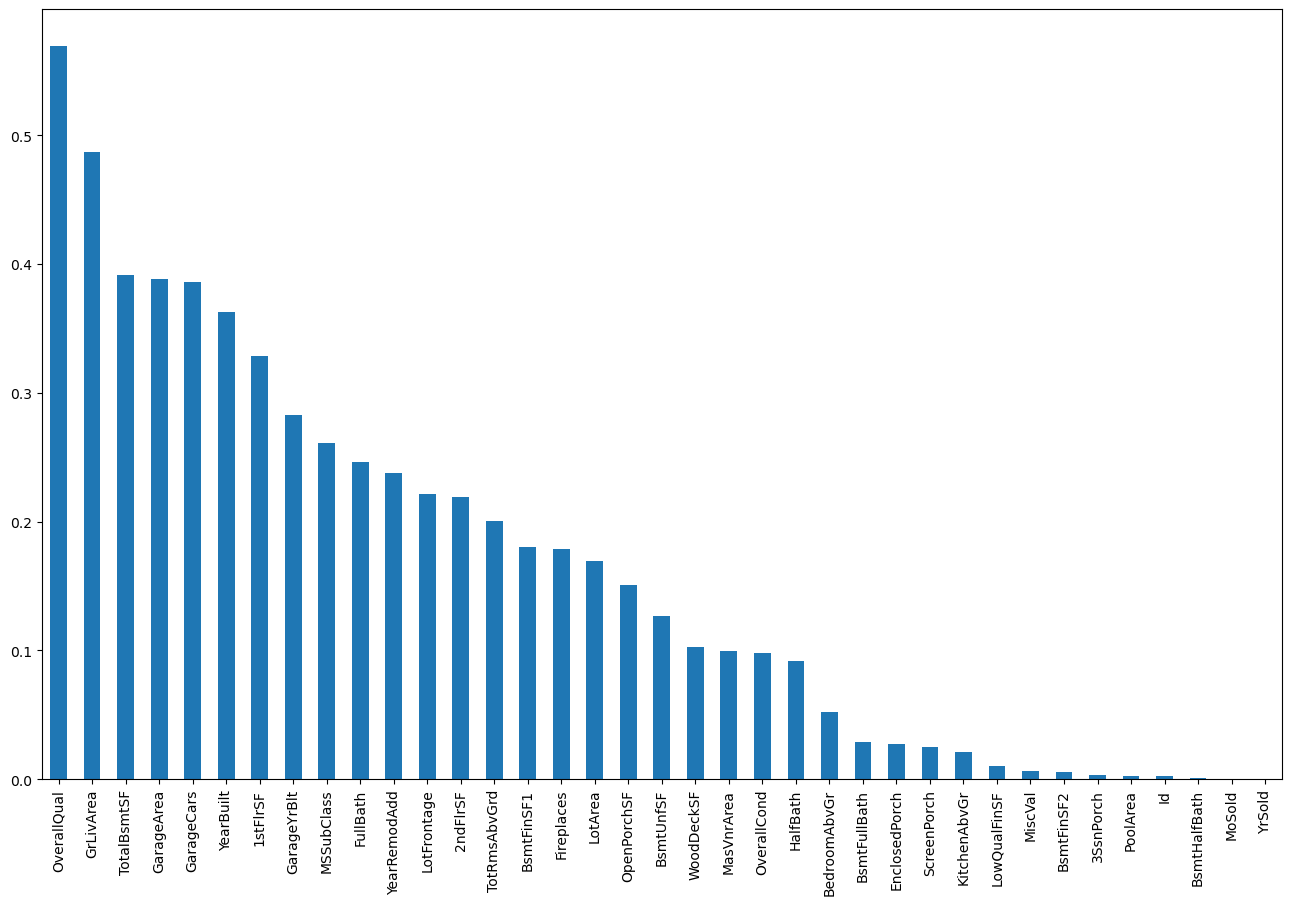

In [32]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(16,10))

In [33]:
from sklearn.feature_selection import SelectPercentile
select_top_columns=SelectPercentile(mutual_info_regression,percentile=20)
select_top_columns.fit(X_train.fillna(0),y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000001418905CF70>)

In [36]:
X_train.columns[select_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')